<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/dropout_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


# Generate Data

In [2]:
X_train = np.linspace(-1,1,20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

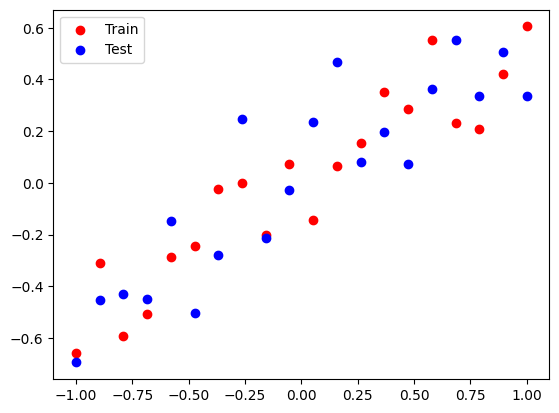

In [7]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [8]:
model = Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500, validation_data=(X_test, y_test), verbose=False)

In [9]:
#Evaluate the model

_, train_mse = model.evaluate(X_train,y_train,verbose=0)
_, test_mse = model.evaluate(X_test,y_test,verbose=0)

print('Train: {}, Test: {}'.format(train_mse,test_mse))
#Test loss is almost 10% more than training loss

Train: 0.0040404582396149635, Test: 0.045749593526124954


In [10]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 102ms/step


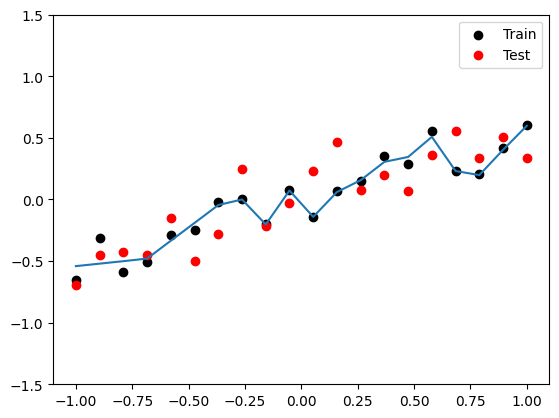

In [12]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

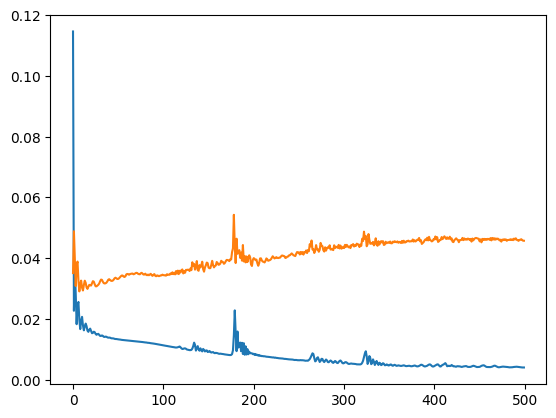

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [21]:
model = Sequential()

model.add(Dense(128,input_dim=1,activation='relu'))
#model.add(Dropout(0.2)) # this will switched off 20% of neurons out of 128 neurons
model.add(Dropout(0.5)) # this will switched off 20% of neurons out of 128 neurons
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500, validation_data=(X_test, y_test), verbose=False)

In [22]:
#Evaluate the model

_, train_mse = model.evaluate(X_train,y_train,verbose=0)
_, test_mse = model.evaluate(X_test,y_test,verbose=0)

print('Train: {}, Test: {}'.format(train_mse,test_mse))
#Test loss is almost 10% more than training loss
#Training loss has increased as compared to previous one
#Test loss has decreased as compared to previous one

Train: 0.016107523813843727, Test: 0.03457288071513176


In [23]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 46ms/step


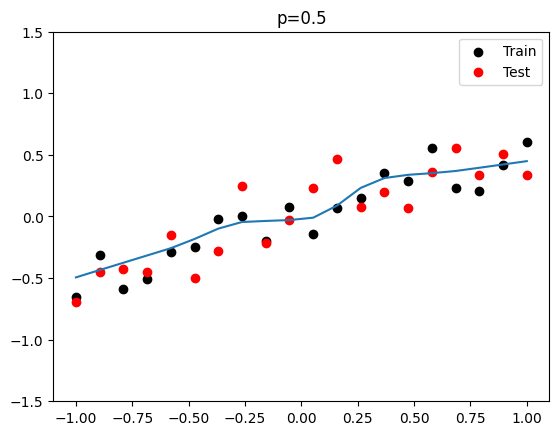

In [26]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.title('p=0.5')
#plt.title('p=0.2')
plt.show()
# this plot is less spikey as compared to previous one

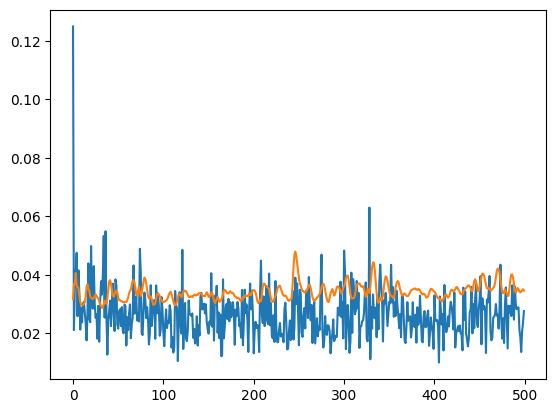

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])